# 02 – Treino e avaliação das CNNs (ECG)

Este notebook orquestra o **treino** e a **avaliação** dos modelos CNN/ResNet18
usando o pipeline de scripts em:

- [src/train.py](cci:7://file:///Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/apps/vision-assistant/src/train.py:0:0-0:0)
- [src/evaluate.py](cci:7://file:///Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/apps/vision-assistant/src/evaluate.py:0:0-0:0)

Ele assume que:

- o [manifest.csv](cci:7://file:///Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/apps/vision-assistant/data/manifest.csv:0:0-0:0) já foi gerado em [apps/vision-assistant/data/manifest.csv](cci:7://file:///Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/apps/vision-assistant/data/manifest.csv:0:0-0:0)
- o arquivo de configuração está em [configs/ecg.yaml](cci:7://file:///Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/apps/vision-assistant/configs/ecg.yaml:0:0-0:0)
- o ambiente virtual com PyTorch já está instalado/ativo fora do notebook

# Imports e paths

In [21]:
import json
import os
from pathlib import Path
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

PROJECT_ROOT = Path(".").resolve().parents[2]  # .../cardioia-app.fase4
APP_DIR = PROJECT_ROOT / "apps" / "vision-assistant"

CONFIG_PATH = APP_DIR / "configs" / "ecg.yaml"
DATA_DIR = APP_DIR / "data"
CKPT_DIR = PROJECT_ROOT / "checkpoints"

PROJECT_ROOT, APP_DIR, CONFIG_PATH, DATA_DIR, CKPT_DIR

(PosixPath('/Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia'),
 PosixPath('/Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/apps/vision-assistant'),
 PosixPath('/Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/apps/vision-assistant/configs/ecg.yaml'),
 PosixPath('/Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/apps/vision-assistant/data'),
 PosixPath('/Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/checkpoints'))

# Verificando arquivos chave

In [22]:
print("Config existe? ", CONFIG_PATH.exists())
print("Manifest existe?", (DATA_DIR / "manifest.csv").exists())
print("Diretório de checkpoints:", CKPT_DIR)

Config existe?  True
Manifest existe? True
Diretório de checkpoints: /Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/checkpoints


# Função auxiliar para rodar scripts

In [23]:
def run_cmd(cmd, cwd=None):
    """Roda um comando de shell e imprime stdout/stderr no notebook."""
    print(">>", " ".join(cmd))
    result = subprocess.run(
        cmd,
        cwd=str(cwd) if cwd is not None else None,
        text=True,
        capture_output=True,
    )
    print("=== STDOUT ===")
    print(result.stdout)
    print("=== STDERR ===")
    print(result.stderr)
    print("Exit code:", result.returncode)
    return result

# Rodar treino

In [24]:
cmd_train = [
    "python3",
    str(APP_DIR / "src" / "train.py"),
    "--config", str(CONFIG_PATH),
    "--model", "resnet18",
    "--batch-size", "32",
    "--epochs", "10",
    "--lr", "1e-4",
    "--unfreeze-last-n", "2",
]

res_train = run_cmd(cmd_train, cwd=PROJECT_ROOT)

>> python3 /Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/apps/vision-assistant/src/train.py --config /Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/apps/vision-assistant/configs/ecg.yaml --model resnet18 --batch-size 32 --epochs 10 --lr 1e-4 --unfreeze-last-n 2
=== STDOUT ===
[ResNet18] parâmetros treináveis: 8395780
Epoch 1/10 - train_loss: 1.9052 | val_loss: 1.3737, val_f1: 0.2863
Epoch 2/10 - train_loss: 1.2483 | val_loss: 1.2293, val_f1: 0.3174
Epoch 3/10 - train_loss: 1.1019 | val_loss: 0.8356, val_f1: 0.6593
Epoch 4/10 - train_loss: 0.8824 | val_loss: 0.7476, val_f1: 0.6757
Epoch 5/10 - train_loss: 0.7214 | val_loss: 0.5564, val_f1: 0.7327
Epoch 6/10 - train_loss: 0.6105 | val_loss: 0.4603, val_f1: 0.8144
Epoch 7/10 - train_loss: 0.5865 | val_loss: 0.4602, val_f1: 0.8030
Epoch 8/10 - train_loss: 0.5823 | val_loss: 0.4131, val_f1: 0.8386
Epoch 9/10 - train_loss: 0.5296 | val_loss: 0.3905, val_f1: 0.8696
Epoch 10/10 - train_loss: 0.4960 | val_

# Rodar avaliação no teste

In [25]:
cmd_eval = [
    "python3",
    str(APP_DIR / "src" / "evaluate.py"),
    "--config", str(CONFIG_PATH),
    "--model", "resnet18",
]

res_eval = run_cmd(cmd_eval, cwd=PROJECT_ROOT)

>> python3 /Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/apps/vision-assistant/src/evaluate.py --config /Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/apps/vision-assistant/configs/ecg.yaml --model resnet18
=== STDOUT ===
[ResNet18] parâmetros treináveis: 11169028
=== Métricas de teste (split: test) ===
Accuracy: 0.9

Classification report:

                   precision    recall  f1-score   support

       infarto_mi       1.00      1.00      1.00        36
batimento_anormal       0.86      0.89      0.87        35
historico_infarto       0.79      0.73      0.76        26
           normal       0.91      0.93      0.92        43

         accuracy                           0.90       140
        macro avg       0.89      0.89      0.89       140
     weighted avg       0.90      0.90      0.90       140

Figure(600x600)
Figure(800x600)
Arquivos salvos em: checkpoints
- Matriz de confusão: checkpoints/confusion_resnet18.png
- Relatório:         

# Carregar métricas do JSON

In [26]:
metrics_path = CKPT_DIR / "metrics_resnet18.json"
print(metrics_path, metrics_path.exists())

if metrics_path.exists():
    with open(metrics_path, "r", encoding="utf-8") as f:
        metrics = json.load(f)
    print("Best epoch:", metrics.get("best_epoch"))
    print("Best val_f1:", metrics.get("best_val_f1"))
    history = pd.DataFrame(metrics.get("history", []))
    display(history.tail())
else:
    print("metrics_resnet18.json não encontrado.")

/Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/checkpoints/metrics_resnet18.json True
Best epoch: 10
Best val_f1: 0.8764835164835165


,epoch,train_loss,val_loss,val_f1
5,6,0.610454,0.460300,0.814368
6,7,0.586536,0.460207,0.803015
7,8,0.582300,0.413098,0.838584
8,9,0.529643,0.390535,0.869647
9,10,0.495968,0.381976,0.876484


# Curvas de perda/F1 ao longo do treino

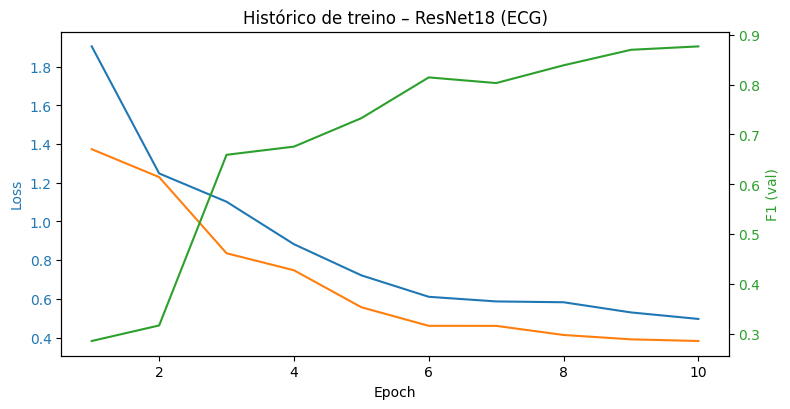

In [27]:
if "history" in locals() and not history.empty:
    fig, ax1 = plt.subplots(figsize=(8, 4))

    ax1.plot(history["epoch"], history["train_loss"], label="train_loss", color="C0")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss", color="C0")
    ax1.tick_params(axis="y", labelcolor="C0")

    if "val_loss" in history.columns:
        ax1.plot(history["epoch"], history["val_loss"], label="val_loss", color="C1")

    ax2 = ax1.twinx()
    if "val_f1" in history.columns:
        ax2.plot(history["epoch"], history["val_f1"], label="val_f1", color="C2")
        ax2.set_ylabel("F1 (val)", color="C2")
        ax2.tick_params(axis="y", labelcolor="C2")

    fig.tight_layout()
    plt.title("Histórico de treino – ResNet18 (ECG)")
    plt.show()
else:
    print("Histórico vazio ou treino não rodado neste notebook.")

# Visualizar imagens salvas (confusão / ROC)

Matriz de confusão - /Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/checkpoints/confusion_resnet18.png


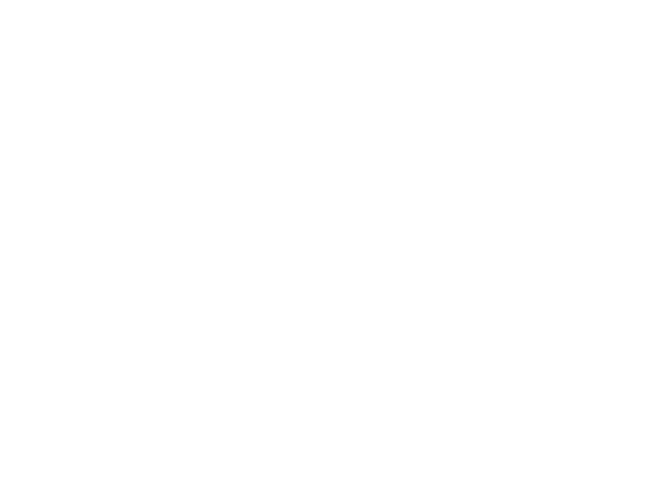

Curvas ROC - /Users/anakolodji/Desktop/ia/CardioIA/cardioia-app.fase4/cardioia/checkpoints/roc_resnet18.png


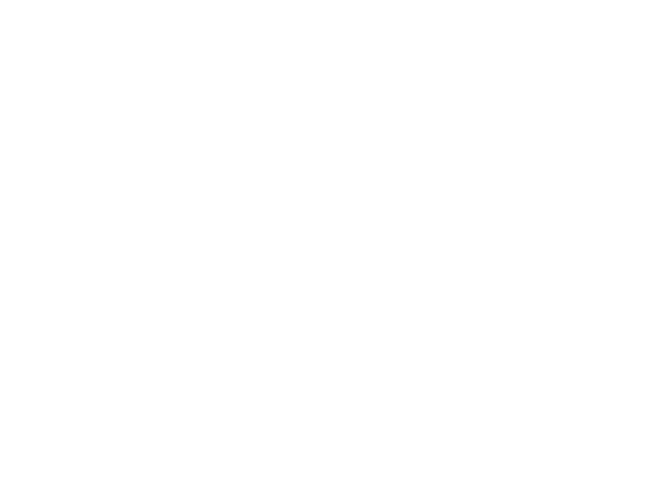

In [28]:
from IPython.display import Image, display

cm_path = CKPT_DIR / "confusion_resnet18.png"
roc_path = CKPT_DIR / "roc_resnet18.png"

for path, title in [(cm_path, "Matriz de confusão"), (roc_path, "Curvas ROC")]:
    if path.exists():
        print(title, "-", path)
        display(Image(filename=str(path)))
    else:
        print("[AVISO] Arquivo não encontrado:", path)

## Conclusões

- Treino do modelo `resnet18` realizado via `src/train.py` usando `configs/ecg.yaml`.
- Melhor época de validação: **epoch 10**, com `best_val_f1 ≈ 0.876` (registrado em `checkpoints/metrics_resnet18.json`).
- Histórico de treino mostra redução consistente de `train_loss` e `val_loss`, com ganho progressivo de `val_f1` ao longo das épocas.
- Avaliação no conjunto de **teste** via `src/evaluate.py` resultou em **accuracy global ≈ 0.90**, com o seguinte resumo por classe:
  - `infarto_mi`: precisão 1.00, recall 1.00, F1 1.00 (36 amostras)
  - `batimento_anormal`: precisão 0.86, recall 0.89, F1 0.87 (35 amostras)
  - `historico_infarto`: precisão 0.79, recall 0.73, F1 0.76 (26 amostras)
  - `normal`: precisão 0.91, recall 0.93, F1 0.92 (43 amostras)
- Principais artefatos gerados em `checkpoints/`:
  - Pesos do melhor modelo: `best_resnet18.pt` (usado posteriormente pela API Flask para inferência e Grad-CAM).
  - Histórico de métricas: `metrics_resnet18.json`.
  - Matriz de confusão: `confusion_resnet18.png`.
  - Curvas ROC: `roc_resnet18.png`.
  - Relatório textual de avaliação: `report_resnet18.txt`.

Esses artefatos servem como referência para a configuração da interface Flask (aplicativo de visão-assistente), que carrega `best_resnet18.pt` para realizar a classificação de novos ECGs e a visualização das regiões de maior atenção via Grad-CAM.